In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
import keras.preprocessing.image as img
from keras.applications.resnet50 import ResNet50

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

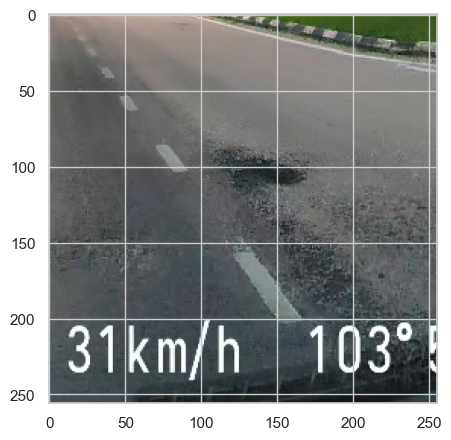

1/1 [==============================] - 1s 805ms/step


  8%|██████▉                                                                            | 1/12 [00:01<00:11,  1.08s/it]

Pothole Road


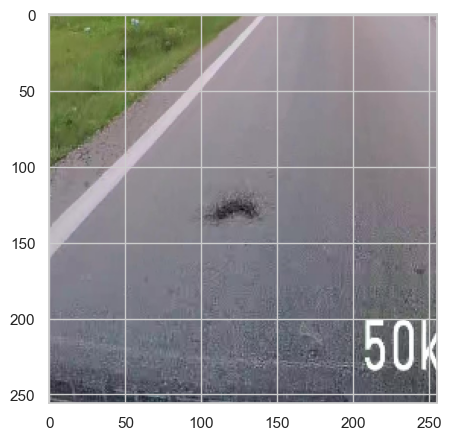

1/1 [==============================] - 0s 98ms/step


 17%|█████████████▊                                                                     | 2/12 [00:01<00:06,  1.57it/s]

Cracks Road


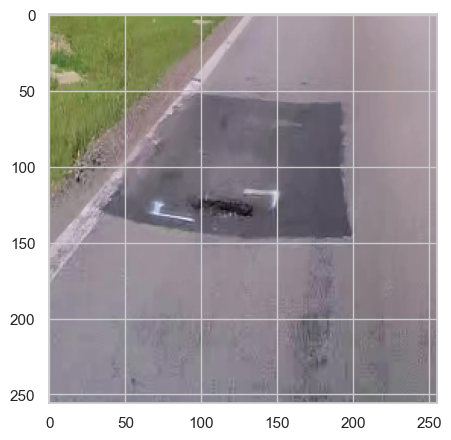

1/1 [==============================] - 0s 96ms/step


 25%|████████████████████▊                                                              | 3/12 [00:01<00:04,  2.04it/s]

Pothole Road


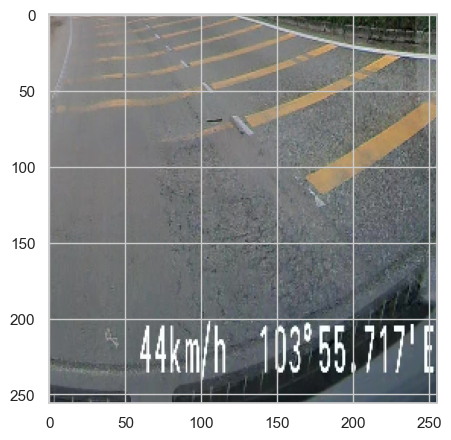

1/1 [==============================] - 0s 98ms/step


 33%|███████████████████████████▋                                                       | 4/12 [00:02<00:03,  2.31it/s]

Cracks Road


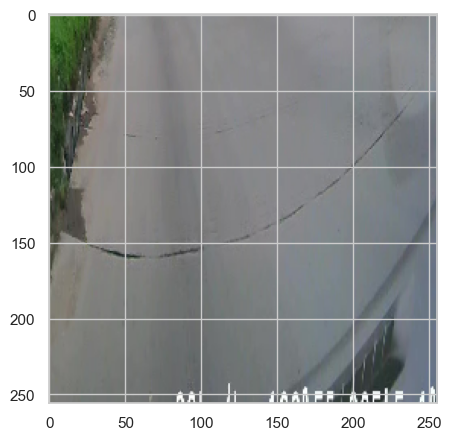

1/1 [==============================] - 0s 96ms/step


 42%|██████████████████████████████████▌                                                | 5/12 [00:02<00:02,  2.52it/s]

Cracks Road


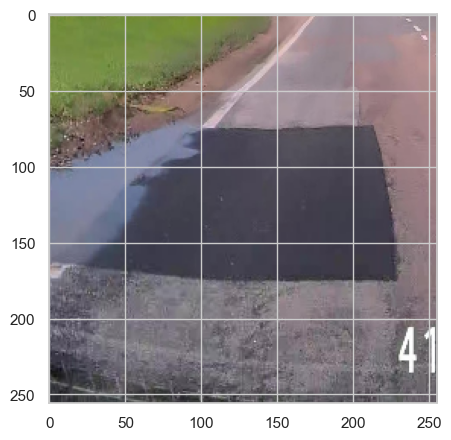

1/1 [==============================] - 0s 95ms/step


 50%|█████████████████████████████████████████▌                                         | 6/12 [00:02<00:02,  2.69it/s]

Patches Road


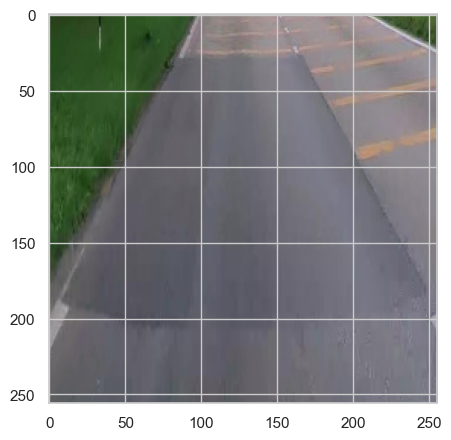

1/1 [==============================] - 0s 96ms/step


 58%|████████████████████████████████████████████████▍                                  | 7/12 [00:03<00:01,  2.81it/s]

Patches Road


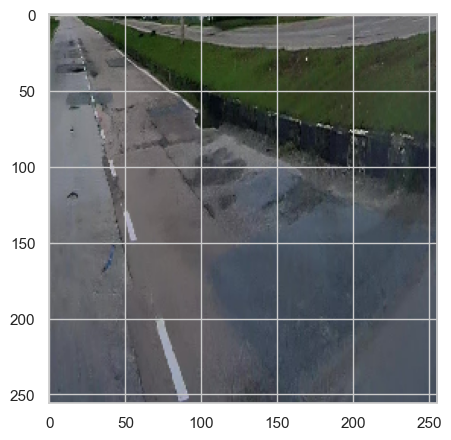

1/1 [==============================] - 0s 99ms/step


 67%|███████████████████████████████████████████████████████▎                           | 8/12 [00:03<00:01,  2.84it/s]

Patches Road


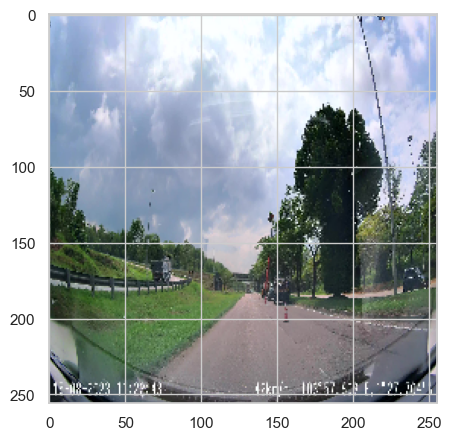

1/1 [==============================] - 0s 98ms/step


 75%|██████████████████████████████████████████████████████████████▎                    | 9/12 [00:03<00:01,  2.71it/s]

Plain Road


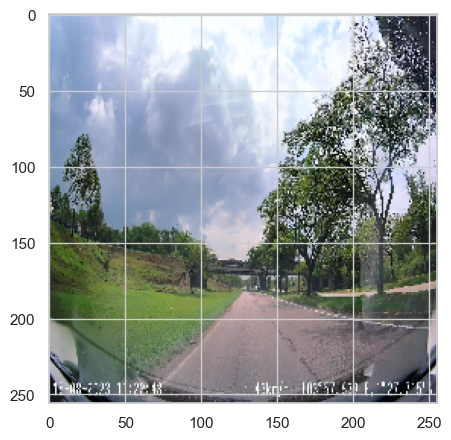

1/1 [==============================] - 0s 107ms/step


 83%|████████████████████████████████████████████████████████████████████▎             | 10/12 [00:04<00:00,  2.60it/s]

Pothole Road


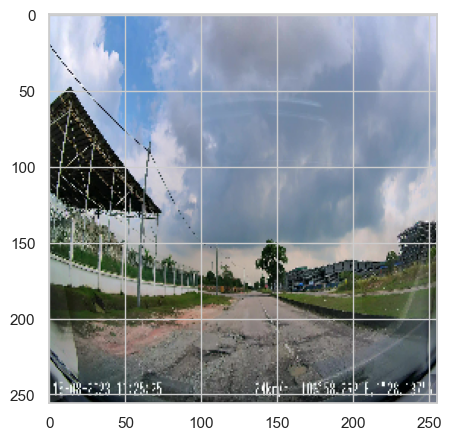

1/1 [==============================] - 0s 98ms/step


 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [00:04<00:00,  2.55it/s]

Plain Road


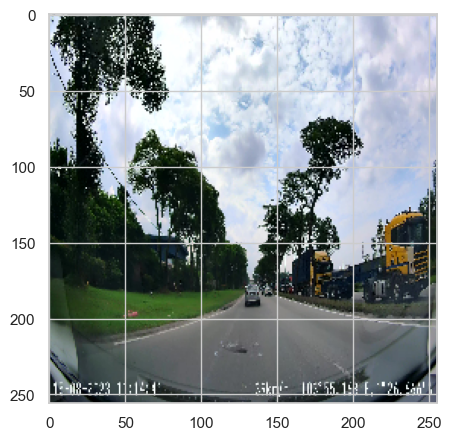

1/1 [==============================] - 0s 109ms/step


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:05<00:00,  2.38it/s]

Plain Road


In [2]:
import os
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('C:/Users/Admin/Desktop/pothole v2/model.h5')

path = "C:/Users/Admin/Desktop/predict"
files = os.listdir(path)
files

# Function to preprocess the image
def preprocess_image(path):
    img = image.load_img(img_path, target_size=(224, 224))  # Assuming 224x224 input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

import os

for i in tqdm(files):
    if not i.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        print(f"Skipping non-image file: {i}")
        continue  # Skip non-image files

    pth = os.path.join(path, i)
    X = cv2.imread(pth, cv2.IMREAD_COLOR)

    if X is None or X.size == 0:
        print(f"Unable to read or empty image: {pth}")
        continue  # Skip to the next image if current one is problematic

    X = cv2.resize(X, (256, 256))

    plt.figure()
    plt.imshow(X[:, :, ::-1])
    plt.show()

    X = np.array(X)
    X = np.expand_dims(X, axis=0)

    y_pred = np.round(model.predict(X))
    if np.array_equal(y_pred[0], [1, 0, 0, 0]):
        print("Pothole Road")
    elif np.array_equal(y_pred[0], [0, 1, 0, 0]):
        print("Cracks Road")
    elif np.array_equal(y_pred[0], [0, 0, 1, 0]):
        print("Patches Road")
    else:
        print("Plain Road")


In [3]:
# Pasirgudang dataset consistently provides low-resolution images
# Absolutely, higher resolution images can often contribute to improved accuracy in this process.

In [5]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import csv
from tensorflow.keras.preprocessing import image

path = "C:/Users/Admin/Desktop/predict"
files = os.listdir(path)

# Function to preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))  # Assuming 256x256 input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

results = []

for i in files:
    if not i.lower().endswith(('.png', '.jpg', '.jpeg')):
        print(f"Skipping non-image file: {i}")
        continue  # Skip non-image files

    pth = os.path.join(path, i)
    X = cv2.imread(pth, cv2.IMREAD_COLOR)

    X = cv2.resize(X, (256, 256))
    X = np.array(X)
    X = np.expand_dims(X, axis=0)

    # Preprocess the image
    preprocessed_img = preprocess_image(pth)

    y_pred = np.round(model.predict(preprocessed_img))
    
    if np.array_equal(y_pred[0], [1, 0, 0, 0]):
        result = "Pothole Road"
    elif np.array_equal(y_pred[0], [0, 1, 0, 0]):
        result = "Cracks Road"
    elif np.array_equal(y_pred[0], [0, 0, 1, 0]):
        result = "Patches Road"
    else:
        result = "Plain Road"

    # Append result to the results list
    results.append({'File': i, 'Prediction': result})

# Write results to a CSV file
csv_filename = 'predictions.csv'
csv_columns = ['File', 'Prediction']

with open(csv_filename, 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
    writer.writeheader()
    for data in results:
        writer.writerow(data)

print(f"Predictions saved in '{csv_filename}' file.")

1/1 [==============================] - 0s 104ms/step
Predictions saved in 'predictions.csv' file.
